# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [385]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as pyplot
import math
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

np.random.seed(17)

C1 = '#7fc97f'
C2 = '#beaed4'
C3 = '#fdc086'
C4 = '#ffff99'
C5 = '#386cb0'

%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1.) Is the distribution of body temperatures normal?

With all temperatures combined the data seems to be distibuted normally. The female population has more outliers than the men, yet when they are plotted there is no apparent skewing in the data.

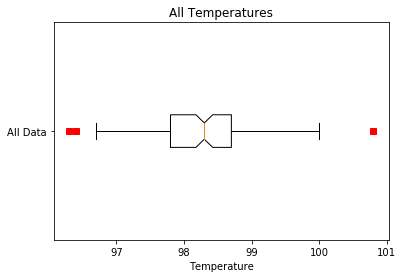

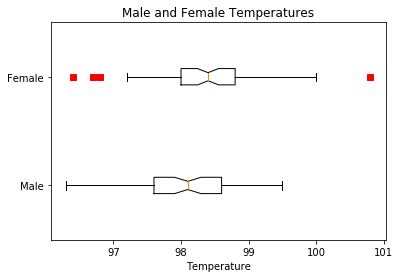

In [386]:
pyplot.figure()
pyplot.boxplot([temp],1 ,'rs',0, labels=['All Data'])
pyplot.xlabel('Temperature')
pyplot.title('All Temperatures')

pyplot.figure()
pyplot.boxplot([male_temp,female_temp],1 ,'rs',0,labels=['Male','Female'])
pyplot.xlabel('Temperature')
pyplot.title('Male and Female Temperatures')
None

## 2.) Is the sample size large? Are the observations independent?

The sample size (**130**) appears small for a traditional experiement, yet it meets the standards for CLT.

The two genders were measured equally and most likely independent of each other, but there are other factors that would declare these observations dependent. A few things I would explore are:

- Time of the year temperature was recorded
- Temperature of the room for each group
- Pregnancy, menstruation, medications, vitamins etc.

These are only a few factors that could skew the data.

In [387]:
len(df)

130

In [388]:
df.groupby('gender').count()

,temperature,heart_rate
gender,,
F,65,65
M,65,65


## Exploring the data:

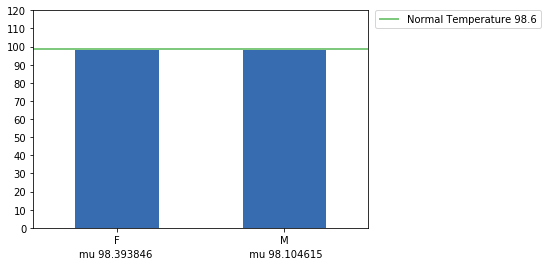

In [389]:
normal=98.6
pyplot.hlines(normal, -100, 100, linewidth=2, color=C1)

df.groupby('gender').temperature.mean().plot(
    kind='bar', ylim=[0, 120], yticks=(np.arange(0, 200, 10)), color=C5)

pyplot.legend(['Normal Temperature 98.6'], bbox_to_anchor=(
    1.02, 1), loc=2, borderaxespad=0)
(df.groupby('gender').temperature.mean())

pyplot.xticks(rotation='horizontal')
pyplot.xlabel('mu 98.393846                               mu 98.104615')
None

In [390]:
male_df = df[df['gender'].str.contains('M')]
female_df = df[df['gender'].str.contains('F')]

temp = df.as_matrix(columns=['temperature'])
hr = df.as_matrix(columns=['heart_rate'])

male_temp = male_df.as_matrix(columns=['temperature'])
male_hr = male_df.as_matrix(columns=['heart_rate'])

female_temp = female_df.as_matrix(columns=['temperature'])
female_hr = female_df.as_matrix(columns=['heart_rate'])

mu_temp = np.mean(temp)
sig_temp = np.std(temp)

mu_hr = np.mean(hr)
sig_hr = np.std(hr)

mmu_temp = np.mean(male_temp)
msig_temp = np.std(male_temp)

mmu_hr = np.mean(male_hr)
msig_hr = np.std(male_hr)

fmu_temp = np.mean(female_temp)
fsig_temp = msig_temp = np.std(female_temp)

fmu_hr = np.mean(female_hr)
fsig_hr = np.std(female_hr)

In [391]:
def plot_stats_temp(mu, sig, gender):
    x = np.linspace(mu - 3 * sig, mu + 3 * sig, 100)
    pyplot.vlines(normal, 0, .6, linewidth=2, color=C1)
    pyplot.vlines(mu, 0, .6, linewidth=2, color=C2)
    pyplot.legend(['Normal Temperature 98.6', gender + ' mu Temperature ' + str(mu)], bbox_to_anchor=(
        1.02, 1), loc=2, borderaxespad=0)
    pyplot.plot(x, mlab.normpdf(x, mu, sig))
    pyplot.xlabel(gender + ' Temperature')
    pyplot.ylabel('PDF')
    pyplot.show()
    print('Difference between normal and ' + gender + ' temperature: ' +
          "{0:.3f}%".format((((normal - mu) / mu) * 100)))
    return


def plot_stats_hr(mu, sig, gender):
    x = np.linspace(mu - 3 * sig, mu + 3 * sig, 100)
    pyplot.vlines(mu, 0, .06, linewidth=2, color=C2)
    pyplot.legend([gender + ' mu Heart Rate ' + str(mu)], bbox_to_anchor=(
        1.02, 1), loc=2, borderaxespad=0)
    pyplot.plot(x, mlab.normpdf(x, mu, sig))
    pyplot.xlabel(gender + ' Heart Rate')
    pyplot.ylabel('PDF')
    return pyplot.show()

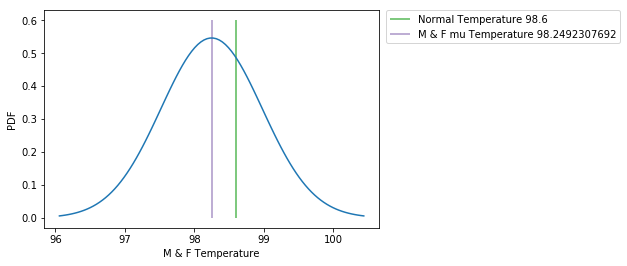

Difference between normal and M & F temperature: 0.357%


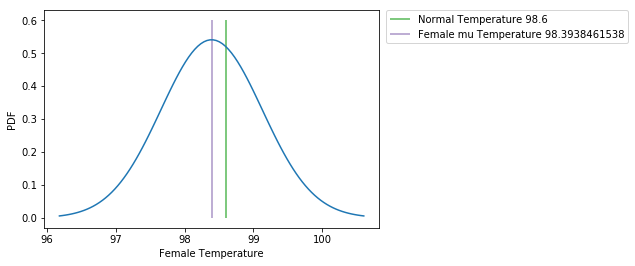

Difference between normal and Female temperature: 0.210%


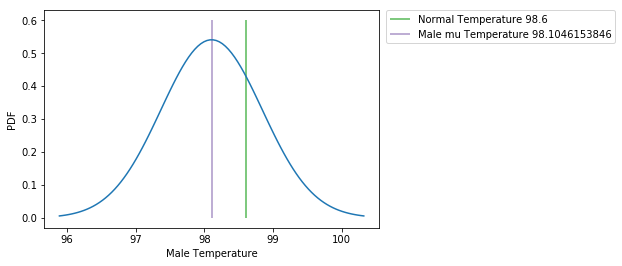

Difference between normal and Male temperature: 0.505%


In [392]:
plot_stats_temp(mu_temp, sig_temp, 'M & F')
plot_stats_temp(fmu_temp, fsig_temp, 'Female')
plot_stats_temp(mmu_temp, msig_temp, 'Male')

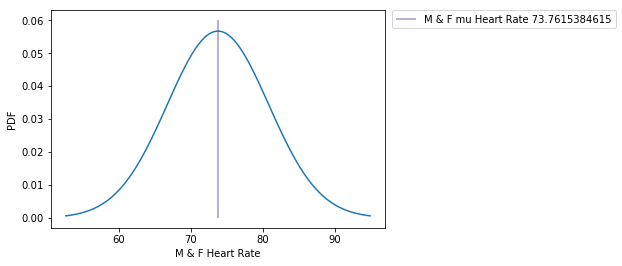

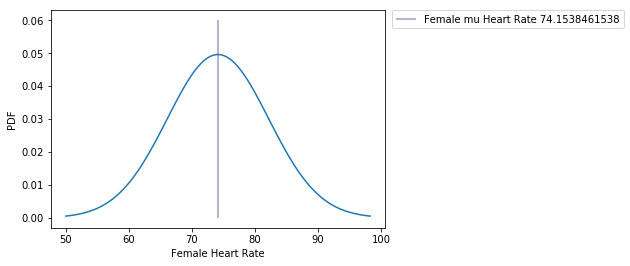

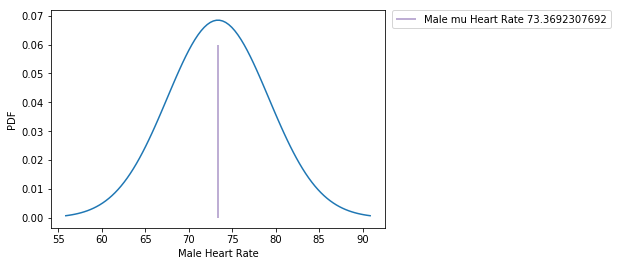

In [393]:
plot_stats_hr(mu_hr, sig_hr, 'M & F')
plot_stats_hr(fmu_hr, fsig_hr, 'Female')
plot_stats_hr(mmu_hr, msig_hr, 'Male')

## Creates a random sample from the distributions:
This allows us to plot a larger sample (**1000**) vs the 130 we were using earlier. 

In [394]:
temp_norm = stats.norm(mu_temp, sig_temp)
hr_norm = stats.norm(mu_hr, sig_hr)

male_temp_norm = stats.norm(mmu_temp, msig_temp)
male_hr_norm = stats.norm(mmu_hr, msig_hr)

female_temp_norm = stats.norm(fmu_temp, fsig_temp)
female_hr_norm = stats.norm(fmu_hr, fsig_hr)

temp_sample = temp_norm.rvs(1000)
hr_sample = hr_norm.rvs(1000)

mtemp_sample = male_temp_norm.rvs(1000)
mhr_sample = male_hr_norm.rvs(1000)

ftemp_sample = female_temp_norm.rvs(1000)
fhr_sample = female_hr_norm.rvs(1000)

sample_mu_temp = np.mean(temp_sample)
sample_sig_temp = np.std(temp_sample)

sample_mmu_temp = np.mean(mtemp_sample)
sample_msig_temp = np.std(mtemp_sample)

sample_fmu_temp = np.mean(ftemp_sample)
sample_fsig_temp = np.std(ftemp_sample)

sample_mu_hr = np.mean(hr_sample)
sample_sig_hr = np.std(hr_sample)

sample_mmu_hr = np.mean(mhr_sample)
sample_msig_hr = np.std(mhr_sample)

sample_fmu_hr = np.mean(fhr_sample)
sample_fsig_hr = np.std(fhr_sample)

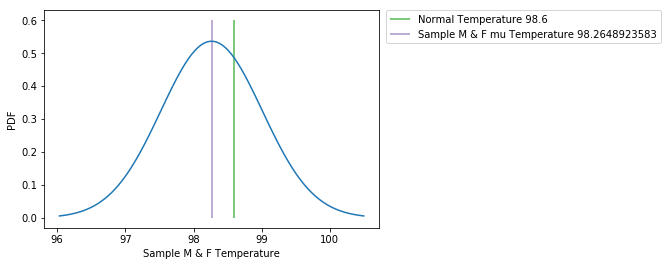

Difference between normal and Sample M & F temperature: 0.341%


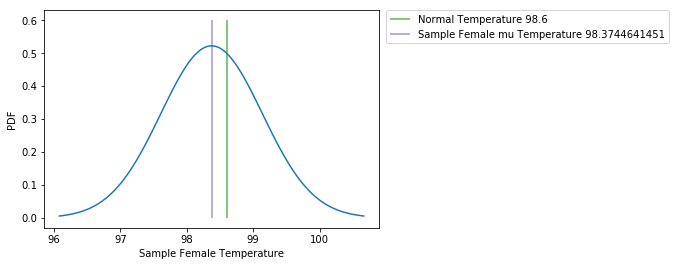

Difference between normal and Sample Female temperature: 0.229%


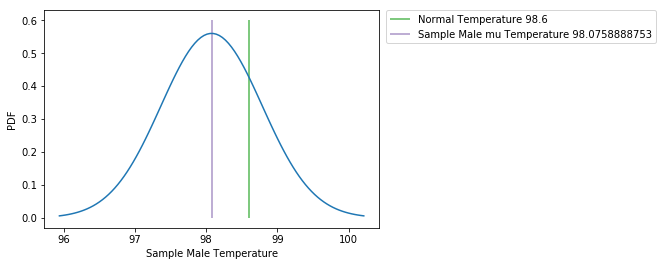

Difference between normal and Sample Male temperature: 0.534%


In [395]:
plot_stats_temp(sample_mu_temp, sample_sig_temp, 'Sample M & F')
plot_stats_temp(sample_fmu_temp, sample_fsig_temp, 'Sample Female')
plot_stats_temp(sample_mmu_temp, sample_msig_temp, 'Sample Male')

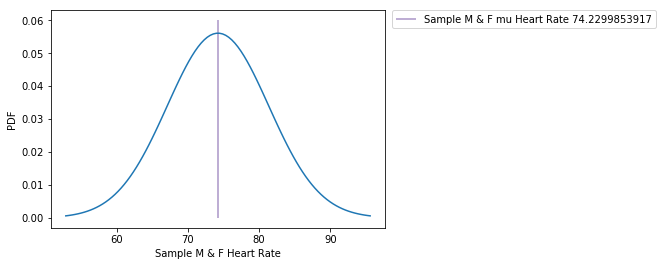

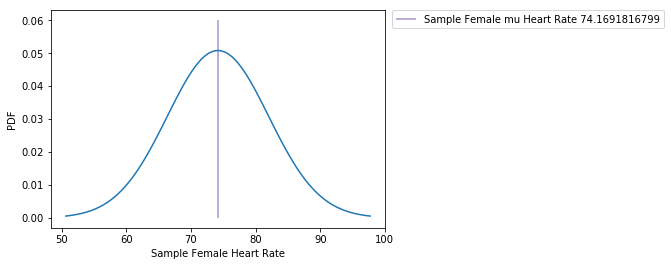

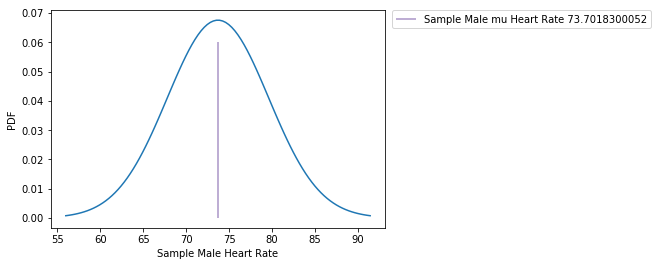

In [396]:
plot_stats_hr(sample_mu_hr, sample_sig_hr, 'Sample M & F')
plot_stats_hr(sample_fmu_hr, sample_fsig_hr, 'Sample Female')
plot_stats_hr(sample_mmu_hr, sample_msig_hr, 'Sample Male')

In [397]:
sample_mu_temp = np.mean(temp_sample)
sample_sig_temp = np.std(temp_sample)

sample_mmu_temp = np.mean(mtemp_sample)
sample_msig_temp = np.std(mtemp_sample)

sample_fmu_temp = np.mean(ftemp_sample)
sample_fsig_temp = np.std(ftemp_sample)

In [398]:
def namestr(obj):
    x = [name for name in globals() if globals()[name] is obj]
    y = ''.join(x)
    z = y.title()
    return z

def thresh_compare(x_sample, y_sample):
    thresh = ((np.std(x_sample) * (np.mean(y_sample))) + (np.std(y_sample)
                                                          * np.mean(x_sample))) / ((np.std(x_sample) + np.std(y_sample)))
    x_below_thresh = (sum(x_sample < thresh))
    y_above_thresh = (sum(y_sample > thresh))
    overlap = (x_below_thresh / len(x_sample)) + (y_above_thresh / len(y_sample))
    print('Thresh:', thresh)
    print(namestr(x_sample), 'Below Thresh:',
          x_below_thresh, '/', len(x_sample))
    print(namestr(y_sample), 'Above Thresh:',
          y_above_thresh, '/', len(y_sample))
    missclassification_rate = overlap / 2
    print('Overlap:', float(overlap))
    print('Missclassification Rate:', "{0:.2f}%".format(
        missclassification_rate * 100))
    return

In [399]:
thresh_compare(mtemp_sample, ftemp_sample)

Thresh: 98.2199771312
Mtemp_Sample Below Thresh: 587 / 1000
Ftemp_Sample Above Thresh: 590 / 1000
Overlap: 1.177
Missclassification Rate: 58.85%


In [400]:
thresh_compare(mhr_sample, fhr_sample)

Thresh: 73.9023767978
Mhr_Sample Below Thresh: 508 / 1000
Fhr_Sample Above Thresh: 507 / 1000
Overlap: 1.0150000000000001
Missclassification Rate: 50.75%


In [401]:
thresh_compare(hr_sample, fhr_sample)

Thresh: 74.2010790344
Hr_Sample Below Thresh: 500 / 1000
Fhr_Sample Above Thresh: 496 / 1000
Overlap: 0.996
Missclassification Rate: 49.80%


In [402]:
thresh_compare(hr_sample, mhr_sample)

Thresh: 73.9412870258
Hr_Sample Below Thresh: 484 / 1000
Mhr_Sample Above Thresh: 489 / 1000
Overlap: 0.973
Missclassification Rate: 48.65%


In [403]:
thresh_compare(temp_sample, ftemp_sample)

Thresh: 98.3189566453
Temp_Sample Below Thresh: 524 / 1000
Ftemp_Sample Above Thresh: 532 / 1000
Overlap: 1.056
Missclassification Rate: 52.80%


In [404]:
thresh_compare(temp_sample, mtemp_sample)

Thresh: 98.168343097
Temp_Sample Below Thresh: 437 / 1000
Mtemp_Sample Above Thresh: 450 / 1000
Overlap: 0.887
Missclassification Rate: 44.35%


## 3.) Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  $t$  or  $z$  statistic?
- Now try using the other test. How is the result be different? Why?

In [405]:
def get_z(sample, x):
    z = (x - np.mean(sample)) / np.std(sample)
    return z


def get_t(sample, null_hypo):
    t = (np.mean(sample) - null_hypo) / (np.std(sample) / math.sqrt(len(sample)))
    return t

- After getting the mean of the data collected, the mean is closer to **98.2 degrees F rahter than 98.6 degrees F.** I created a random sample from the given distribution and got even closer to 98.20 degrees F to confirm this.

In [406]:
np.mean(temp), np.mean(temp_sample), normal

(98.249230769230749, 98.264892358286517, 98.6)

- Since the sample size is above 30 it is appropriate to use the $z$ statistic, however there is an unknown standard deviation so we must use the **$t$ statistic.**

- In this situation we would use a one sample test because we are testing our sample, which includes the men and women, against the "normal" body temperature, 98.6 degrees F. It will be a two tailed test since we are measuring to determine if the population temperature is above **or** below 98.6 degrees F.

In [407]:
t = get_t(temp, normal)
print('T statastic:', t)

T statastic: -5.47592520208


In [408]:
z = get_z(temp_sample, normal)
print('Z statastic:', z)

Z statastic: 0.450518647368


## 4.) At what temperature should we consider someone's temperature to be "abnormal"?

In [409]:
def ci(sample, interval):
    confidence = interval * .01
    n = len(sample)
    mu = np.mean(sample)
    se = stats.sem(sample)
    h = se * stats.t._ppf((1 + confidence) / 2, n - 1)
    print(namestr(sample), 'mu:', mu)
    print("From this sample, we can be confident that {0:.0f}%".format(
        confidence * 100), 'of the values in', namestr(sample), 'are between:')
    print(float(mu - h), 'and', float(mu + h))
    return

If someone had a temperature **less than 98.12 dgerees F** or **greater than 98.37 degrees F** we would consider their temperature abnormal. Therefore, the "normal" temperature of 98.6 degrees F is an abnormal temperature.

In [410]:
ci(temp,95)

Temp mu: 98.2492307692
From this sample, we can be confident that 95% of the values in Temp are between:
98.12200290560801 and 98.37645863285348


## 5.) Is there a significant difference between males and females in normal temperature?
- What test did you use and why?
- Write a story with your conclusion in the context of the original problem.

In [411]:
diff_mu = abs (mmu_temp - fmu_temp)
"{0:.5f}%".format((diff_mu / mmu_temp)*100)

'0.29482%'

In [412]:
"{0:.5f}%".format((diff_mu / fmu_temp)*100)

'0.29395%'

The difference in means is less than .5%. 